# Imporing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data Collection and Analysis

In [2]:
# Loading the data from csv file to a pandas dataframe
insurance_dataset = pd.read_csv('insurance.csv')

In [3]:
# print first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# print last 5 rows of the dataframe
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# number of rows and columns
insurance_dataset.shape


(1338, 7)

In [6]:
# getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Checking for missing values

In [7]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Analysis

In [8]:
## Statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

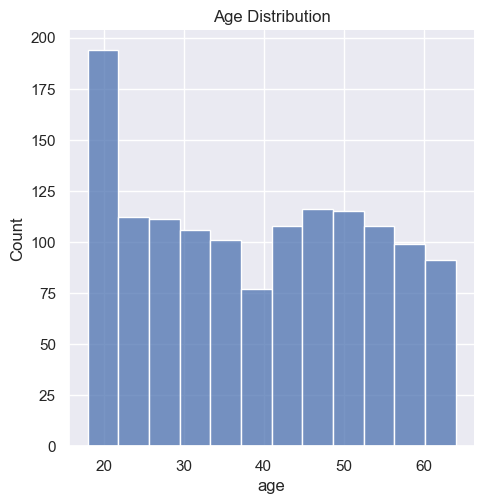

In [10]:
## Find the distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

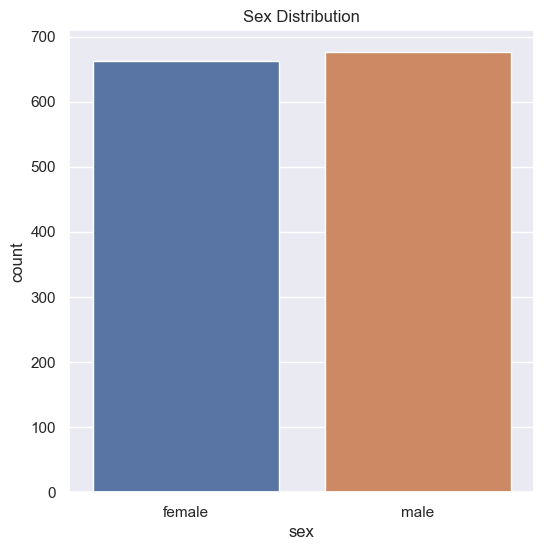

In [12]:
# Gender column (catagorical column)---> countplot
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data = insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [13]:
## Another way to understand the distribution
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 600x600 with 0 Axes>

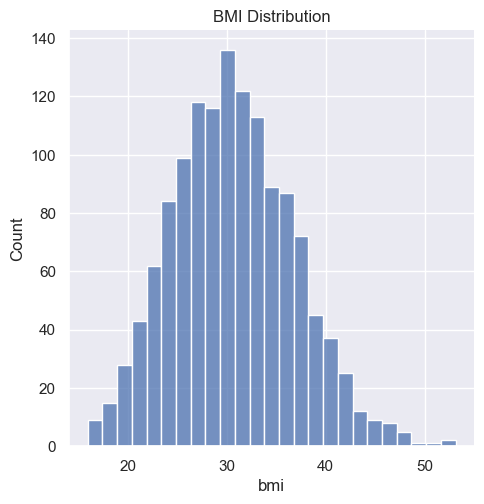

In [14]:
## bmi distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

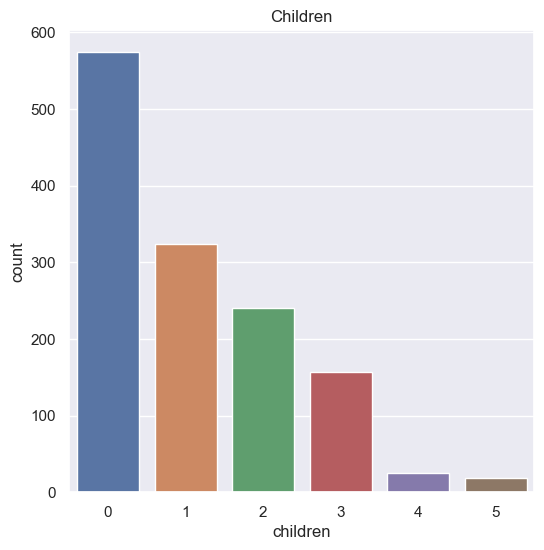

In [15]:
## childern column distribution

plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [16]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

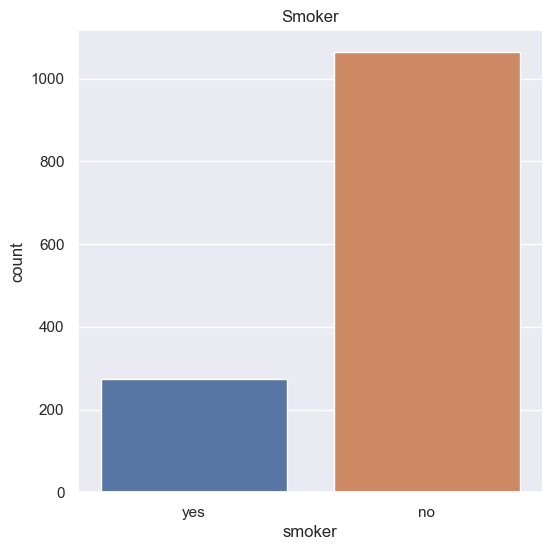

In [17]:
## Smoker column distribution

plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Smoker')
plt.show()

In [18]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

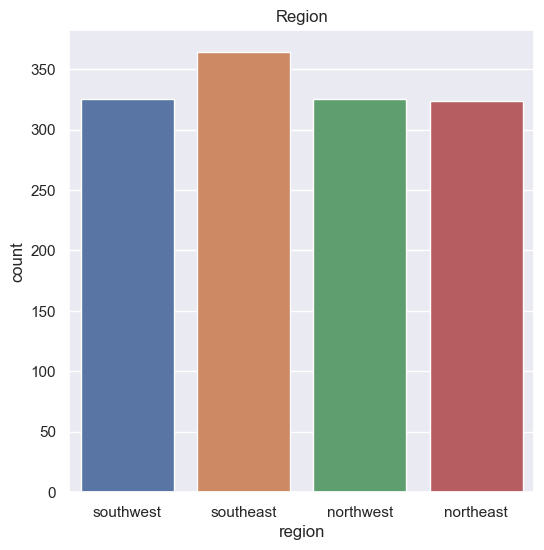

In [19]:
## Region column distribution

plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Region')
plt.show()

In [20]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 600x600 with 0 Axes>

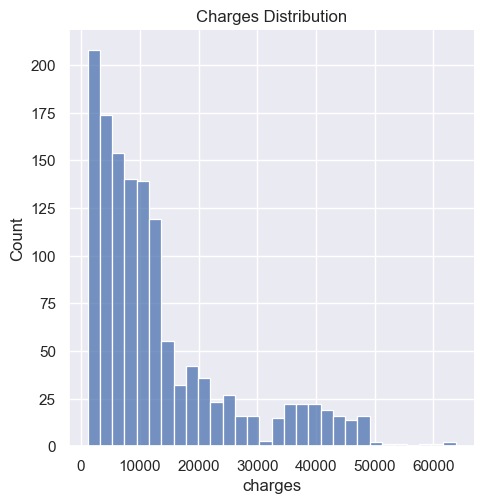

In [21]:
## charges column distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

### Data Preprocessing

In [22]:
## We can not fit the catagorical data to our ML model
## We will convert those catagorical data to a numerical value like   0 , 1
# This process is call Encoding

#### Encoding the catagorical features

In [24]:
#Encoding sex column
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# Encoding Smoker column

insurance_dataset.replace({'smoker': {'yes':0,'no':1}}, inplace=True)

#Encoding Region Column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

## Splitting the features and Target

In [25]:
X =insurance_dataset.drop(columns='charges', axis=1)
Y =insurance_dataset['charges']

In [26]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [27]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Splitting the data into Training data and Testing data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)


In [29]:
X.shape, X_train.shape, X_test.shape

((1338, 6), (1070, 6), (268, 6))

## Model Training

### Linear Regression Model

In [31]:
# Loading the Linear Regression Model
regressor = LinearRegression()

In [32]:
regressor.fit(X_train,Y_train)

LinearRegression()

### Model Evaluation

### Prediction on training data

In [33]:
training_data_prediction = regressor.predict(X_train)

# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print(' R squared value : ', r2_train)


 R squared value :  0.751505643411174


### Prediction on test data

In [34]:
test_data_prediction = regressor.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test)


R squared value :  0.7447273869684077


## Building  a Predictive System

In [35]:
input_data = (31,1,25.74,0,1,0)

# Change the tuple to a numpy array
input_data_as_numpy_array =np.asarray(input_data)

In [36]:
# Reshape the array for single instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [38]:
prediction = regressor.predict(input_data_reshaped)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
prediction

array([3760.0805765])

In [41]:
print('The insurance cost in USD is', prediction[0])

The insurance cost in USD is 3760.080576496046
